In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
# Загрузка данных в датафрэйм
data = pd.read_csv('/Users/wyrtnh.w/DataEngineeringITMO2025/data/Homo_sapiens.GRCh38.92.csv')

/var/folders/jb/lq1vf3td1vnb6zlkhgdkg2k40000gn/T/ipykernel_80640/3794810117.py:2: DtypeWarning: Columns (0,30) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/Users/wyrtnh.w/DataEngineeringITMO2025/data/Homo_sapiens.GRCh38.92.csv')


In [5]:
# Вывод первых 10 строк датасета
data.head(10)

,seqname,source,feature,start,end,score,strand,frame,CCDS,basic,...,mRNA_start_NF,protein_id,protein_version,seleno,transcript_biotype,transcript_id,transcript_name,transcript_source,transcript_support_level,transcript_version
0,1,havana,gene,11869,14409,.,+,.,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,havana,transcript,11869,14409,.,+,.,NaN,1.0,...,NaN,NaN,NaN,NaN,processed_transcript,ENST00000456328,DDX11L1-202,havana,1,2.0
2,1,havana,exon,11869,12227,.,+,.,NaN,1.0,...,NaN,NaN,NaN,NaN,processed_transcript,ENST00000456328,DDX11L1-202,havana,1,2.0
3,1,havana,exon,12613,12721,.,+,.,NaN,1.0,...,NaN,NaN,NaN,NaN,processed_transcript,ENST00000456328,DDX11L1-202,havana,1,2.0
4,1,havana,exon,13221,14409,.,+,.,NaN,1.0,...,NaN,NaN,NaN,NaN,processed_transcript,ENST00000456328,DDX11L1-202,havana,1,2.0
5,1,havana,transcript,12010,13670,.,+,.,NaN,1.0,...,NaN,NaN,NaN,NaN,transcribed_unprocessed_pseudogene,ENST00000450305,DDX11L1-201,havana,NaN,2.0
6,1,havana,exon,12010,12057,.,+,.,NaN,1.0,...,NaN,NaN,NaN,NaN,transcribed_unprocessed_pseudogene,ENST00000450305,DDX11L1-201,havana,NaN,2.0
7,1,havana,exon,12179,12227,.,+,.,NaN,1.0,...,NaN,NaN,NaN,NaN,transcribed_unprocessed_pseudogene,ENST00000450305,DDX11L1-201,havana,NaN,2.0
8,1,havana,exon,12613,12697,.,+,.,NaN,1.0,...,NaN,NaN,NaN,NaN,transcribed_unprocessed_pseudogene,ENST00000450305,DDX11L1-201,havana,NaN,2.0
9,1,havana,exon,12975,13052,.,+,.,NaN,1.0,...,NaN,NaN,NaN,NaN,transcribed_unprocessed_pseudogene,ENST00000450305,DDX11L1-201,havana,NaN,2.0


# **Очистка данных**

In [6]:
data.isnull().sum()

seqname                           0
source                            0
feature                           0
start                             0
end                               0
score                             0
strand                            0
frame                             0
CCDS                        1583406
basic                       1066773
ccds_id                     1583406
cds_end_NF                  2422869
cds_start_NF                2497466
exon_id                     1452263
exon_number                  554721
exon_version                1452263
gene_biotype                      0
gene_id                           0
gene_name                         0
gene_source                       0
gene_version                      0
mRNA_end_NF                 2406518
mRNA_start_NF               2489901
protein_id                  1954917
protein_version             1954917
seleno                      2687953
transcript_biotype            58395
transcript_id               

In [7]:
missing_data = (data.isnull().sum() / len(data)) * 100
missing_data

seqname                      0.000000
source                       0.000000
feature                      0.000000
start                        0.000000
end                          0.000000
score                        0.000000
strand                       0.000000
frame                        0.000000
CCDS                        58.872175
basic                       39.663388
ccds_id                     58.872175
cds_end_NF                  90.084014
cds_start_NF                92.857584
exon_id                     53.996184
exon_number                 20.624926
exon_version                53.996184
gene_biotype                 0.000000
gene_id                      0.000000
gene_name                    0.000000
gene_source                  0.000000
gene_version                 0.000000
mRNA_end_NF                 89.476072
mRNA_start_NF               92.576312
protein_id                  72.685221
protein_version             72.685221
seleno                      99.940027
transcript_b

Есть признаки, у которых пропуски > 50 %, поэтому удалем их

In [8]:
# Удаляем столбцы, где пропусков больше 50%
data = data.loc[:, data.isnull().mean() <= 0.5]

In [9]:
missing_data = (data.isnull().sum() / len(data)) * 100
missing_data

seqname                      0.000000
source                       0.000000
feature                      0.000000
start                        0.000000
end                          0.000000
score                        0.000000
strand                       0.000000
frame                        0.000000
basic                       39.663388
exon_number                 20.624926
gene_biotype                 0.000000
gene_id                      0.000000
gene_name                    0.000000
gene_source                  0.000000
gene_version                 0.000000
transcript_biotype           2.171168
transcript_id                2.171168
transcript_name              2.171168
transcript_source            2.171168
transcript_support_level     8.404590
transcript_version           2.171168
dtype: float64

In [10]:
data

,seqname,source,feature,start,end,score,strand,frame,basic,exon_number,...,gene_id,gene_name,gene_source,gene_version,transcript_biotype,transcript_id,transcript_name,transcript_source,transcript_support_level,transcript_version
0,1,havana,gene,11869,14409,.,+,.,NaN,NaN,...,ENSG00000223972,DDX11L1,havana,5,NaN,NaN,NaN,NaN,NaN,NaN
1,1,havana,transcript,11869,14409,.,+,.,1.0,NaN,...,ENSG00000223972,DDX11L1,havana,5,processed_transcript,ENST00000456328,DDX11L1-202,havana,1,2.0
2,1,havana,exon,11869,12227,.,+,.,1.0,1.0,...,ENSG00000223972,DDX11L1,havana,5,processed_transcript,ENST00000456328,DDX11L1-202,havana,1,2.0
3,1,havana,exon,12613,12721,.,+,.,1.0,2.0,...,ENSG00000223972,DDX11L1,havana,5,processed_transcript,ENST00000456328,DDX11L1-202,havana,1,2.0
4,1,havana,exon,13221,14409,.,+,.,1.0,3.0,...,ENSG00000223972,DDX11L1,havana,5,processed_transcript,ENST00000456328,DDX11L1-202,havana,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2689561,KI270713.1,ensembl,transcript,35407,35916,.,+,.,1.0,NaN,...,ENSG00000268674,FAM231C,ensembl,2,protein_coding,ENST00000601199,FAM231C-201,ensembl,NaN,2.0
2689562,KI270713.1,ensembl,exon,35407,35916,.,+,.,1.0,1.0,...,ENSG00000268674,FAM231C,ensembl,2,protein_coding,ENST00000601199,FAM231C-201,ensembl,NaN,2.0
2689563,KI270713.1,ensembl,CDS,35407,35913,.,+,0,1.0,1.0,...,ENSG00000268674,FAM231C,ensembl,2,protein_coding,ENST00000601199,FAM231C-201,ensembl,NaN,2.0
2689564,KI270713.1,ensembl,start_codon,35407,35409,.,+,0,1.0,1.0,...,ENSG00000268674,FAM231C,ensembl,2,protein_coding,ENST00000601199,FAM231C-201,ensembl,NaN,2.0


In [11]:
df = data.copy()

# **Приведение типов**

In [12]:
df.dtypes

seqname                      object
source                       object
feature                      object
start                         int64
end                           int64
score                        object
strand                       object
frame                        object
basic                       float64
exon_number                 float64
gene_biotype                 object
gene_id                      object
gene_name                    object
gene_source                  object
gene_version                  int64
transcript_biotype           object
transcript_id                object
transcript_name              object
transcript_source            object
transcript_support_level     object
transcript_version          float64
dtype: object

In [13]:
# Числовые колонки
df['basic'] = df['basic'].fillna(-1).astype(int)
df['exon_number'] = df['exon_number'].fillna(-1).astype(int)
df['transcript_version'] = df['transcript_version'].fillna(-1).astype(int)

# Все текстовые колонки делаем строками
text_cols = ['seqname', 'source', 'feature', 'score', 'strand', 'frame', 
             'gene_biotype', 'transcript_biotype', 'transcript_support_level',
             'gene_id', 'gene_name', 'gene_source', 'transcript_id', 
             'transcript_name', 'transcript_source']

for col in text_cols:
    df[col] = df[col].fillna('unknown').astype(str)

# Проверяем типы
df.dtypes

seqname                     object
source                      object
feature                     object
start                        int64
end                          int64
score                       object
strand                      object
frame                       object
basic                        int64
exon_number                  int64
gene_biotype                object
gene_id                     object
gene_name                   object
gene_source                 object
gene_version                 int64
transcript_biotype          object
transcript_id               object
transcript_name             object
transcript_source           object
transcript_support_level    object
transcript_version           int64
dtype: object

In [14]:
pip install fastparquet

Note: you may need to restart the kernel to use updated packages.


In [15]:
# Сохраняем в Parquet
df.to_parquet('genome_data.parquet', index=False, engine='fastparquet')

# **Метрики качества данных**

### **1. Completeness – полнота данных**

In [16]:
completeness = (1 - df.isnull().mean()).round(4)
print("Completeness (полнота данных):")
print(completeness)

Completeness (полнота данных):
seqname                     1.0
source                      1.0
feature                     1.0
start                       1.0
end                         1.0
score                       1.0
strand                      1.0
frame                       1.0
basic                       1.0
exon_number                 1.0
gene_biotype                1.0
gene_id                     1.0
gene_name                   1.0
gene_source                 1.0
gene_version                1.0
transcript_biotype          1.0
transcript_id               1.0
transcript_name             1.0
transcript_source           1.0
transcript_support_level    1.0
transcript_version          1.0
dtype: float64


Нет пропущенных значений (все данные заполнены)

### **2. Uniqueness – уникальность записей**

In [17]:
# Проверяем ключевые идентификаторы
key_columns = ['gene_id', 'transcript_id', 'gene_name']
uniqueness = {}

for col in key_columns:
    if col in df.columns:
        total = len(df[col])
        unique = df[col].nunique()
        uniqueness[col] = round(unique / total, 4)

print("Uniqueness (уникальность):")
for col, score in uniqueness.items():
    print(f"{col}: {score}")

Uniqueness (уникальность):
gene_id: 0.0217
transcript_id: 0.0758
gene_name: 0.0211


Очень низкая уникальность идентификаторов (это нормально для геномных данных – один ген может иметь много транскриптов)

### **3.  Duplication Rate – уровень дубликатов**

In [20]:
# Дубликаты по всем колонкам
total_rows = len(df)
duplicate_rows = df.duplicated().sum()
duplication_rate = round(duplicate_rows / total_rows, 4)

print(f"Duplication Rate (уровень дубликатов): {duplication_rate}")
print(f"Дубликатов: {duplicate_rows} из {total_rows} строк")

# Дубликаты по ключевым колонкам
if 'gene_id' in df.columns:
    gene_duplicates = df['gene_id'].duplicated().sum()
    gene_duplication_rate = round(gene_duplicates / total_rows, 4)
    print(f"Duplication Rate по gene_id: {gene_duplication_rate}")

Duplication Rate (уровень дубликатов): 0.0
Дубликатов: 0 из 2689566 строк
Duplication Rate по gene_id: 0.9783


По gene_id: {gene_duplication_rate} - 97.83% дубликатов ID (это нормально – гены повторяются в разных записях (экзоны, транскрипты))

### **4. Outlier Ratio - доля выбросов**

In [19]:
# Для числовых колонок
numeric_cols = ['start', 'end', 'basic', 'exon_number', 'transcript_version']
outlier_ratio = {}

for col in numeric_cols:
    if col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
        outlier_ratio[col] = round(outliers / len(df), 4)

print("Outlier Ratio (доля выбросов):")
for col, ratio in outlier_ratio.items():
    print(f"{col}: {ratio}")

Outlier Ratio (доля выбросов):
start: 0.015
end: 0.015
basic: 0.0
exon_number: 0.0718
transcript_version: 0.001


Приемлемый уровень выбросов

In [29]:
import matplotlib.pyplot as plt

start: 40216 выбросов
end: 40216 выбросов
exon_number: 193073 выбросов


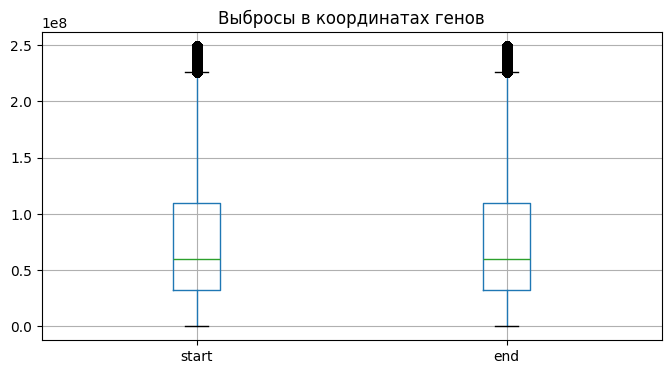

In [30]:
# Прроверка выбросов
for col in ['start', 'end', 'exon_number']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    outliers = ((df[col] < Q1 - 1.5*(Q3-Q1)) | (df[col] > Q3 + 1.5*(Q3-Q1))).sum()
    print(f"{col}: {outliers} выбросов")

# Простой boxplot
plt.figure(figsize=(8, 4))
df[['start', 'end']].boxplot()
plt.title("Выбросы в координатах генов")
plt.show()

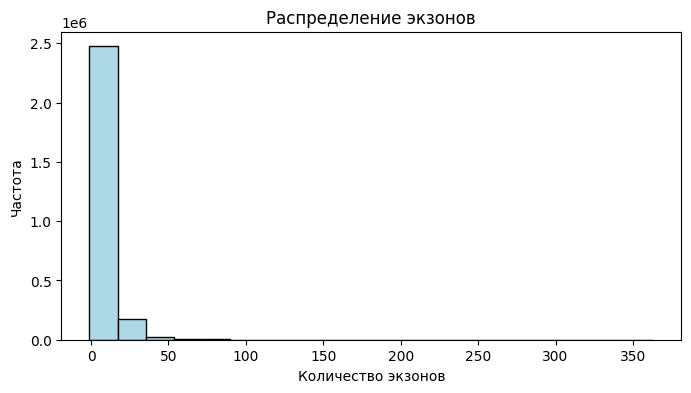

In [31]:
# Гистограмма количества экзонов
plt.figure(figsize=(8, 4))
plt.hist(df['exon_number'], bins=20, color='lightblue', edgecolor='black')
plt.title("Распределение экзонов")
plt.xlabel("Количество экзонов")
plt.ylabel("Частота")
plt.show()

### **5. Семантический анализ**

In [27]:
# Типы генов
print("Топ 10 типов генов:")
print(df['gene_biotype'].value_counts().head(10))

# Типы транскриптов
print("\nТоп 10 типов транскриптов:")
print(df['transcript_biotype'].value_counts().head(10))

# Особенности генов
print(f"\nОбзор генов:")
print(f"Всего уникальных генов: {df['gene_id'].nunique()}")
print(f"Всего уникальных имен генов: {df['gene_name'].nunique()}")

Топ 10 типов генов:
gene_biotype
protein_coding                        2457398
lincRNA                                 58519
antisense                               45385
processed_pseudogene                    32270
transcribed_unprocessed_pseudogene      18075
processed_transcript                    17540
unprocessed_pseudogene                  13539
misc_RNA                                 6663
snRNA                                    5727
miRNA                                    5637
Name: count, dtype: int64

Топ 10 типов транскриптов:
transcript_biotype
protein_coding                        1823877
nonsense_mediated_decay                332122
processed_transcript                   154591
retained_intron                        148122
unknown                                 58395
lincRNA                                 56392
antisense                               45662
processed_pseudogene                    22056
unprocessed_pseudogene                  10877
transcribed_unproces

– Доминируют protein_coding гены – 91% записей относятся к белково-кодирующим генам

– Разнообразие биологических функций – преобладают protein_coding транскрипты, но есть много регуляторных типов

– 58K уникальных генов - база содержит аннотации для 58 тысяч генов с почти уникальными именами

### **6. Корреляции**

In [24]:
# Простые корреляции между числовыми признаками
numeric_cols = ['start', 'end', 'basic', 'exon_number', 'transcript_version']
numeric_df = df[numeric_cols]

print("Корреляции:")
print(numeric_df.corr().round(3))

# Самая сильная корреляция
corr_matrix = numeric_df.corr()
strong_corr = corr_matrix.unstack().sort_values(ascending=False)
strong_corr = strong_corr[strong_corr < 0.99]  # убираем корреляцию с собой
print(f"\nСамая сильная корреляция: {strong_corr.index[0]} = {strong_corr.iloc[0]:.3f}")

Корреляции:
                    start    end  basic  exon_number  transcript_version
start               1.000  1.000  0.016        0.060               0.007
end                 1.000  1.000  0.016        0.060               0.007
basic               0.016  0.016  1.000        0.214               0.354
exon_number         0.060  0.060  0.214        1.000               0.211
transcript_version  0.007  0.007  0.354        0.211               1.000

Самая сильная корреляция: ('transcript_version', 'basic') = 0.354


Сильная связь start-end – координаты генов идеально коррелируют

### **7. Фичеинжиниринг (базовые фичи)**

In [25]:
# Длина гена/транскрипта
df['gene_length'] = df['end'] - df['start']
print(f"Средняя длина гена: {df['gene_length'].mean():.0f} пар оснований")

# Количество экзонов на транскрипт
if 'exon_number' in df.columns:
    exon_stats = df.groupby('transcript_id')['exon_number'].max().describe()
    print(f"\nСтатистика экзонов на транскрипт:")
    print(f"Мин: {exon_stats['min']}, Макс: {exon_stats['max']}, Среднее: {exon_stats['mean']:.1f}")

# Признак "длинный ген"
df['is_long_gene'] = (df['gene_length'] > df['gene_length'].median()).astype(int)
print(f"\nДлинные гены (> медианы): {df['is_long_gene'].mean():.1%}")

Средняя длина гена: 3558 пар оснований

Статистика экзонов на транскрипт:
Мин: -1.0, Макс: 363.0, Среднее: 6.1

Длинные гены (> медианы): 49.7%


Средний ген 3.5K пар оснований – с равным распределением на короткие и длинные гены

### **8. Обзор источников данных**

In [28]:
# Источники генов
print("Источники аннотаций генов:")
print(df['source'].value_counts())

# Уровень поддержки транскриптов
print("\nУровень поддержки транскриптов:")
print(df['transcript_support_level'].value_counts())

Источники аннотаций генов:
source
havana            1752993
ensembl_havana     685143
ensembl            245756
mirbase              5637
insdc                  37
Name: count, dtype: int64

Уровень поддержки транскриптов:
transcript_support_level
1                                      928367
5                                      615090
2                                      461215
3                                      249724
unknown                                226047
                                        ...  
3 (assigned to previous version 8)         48
4 (assigned to previous version 4)         46
2 (assigned to previous version 11)        44
3 (assigned to previous version 4)         38
3 (assigned to previous version 9)         23
Name: count, Length: 66, dtype: int64


Havana-Ensembl коллаборация – данные в основном от двух ведущих консорциумов аннотаций